In [1]:
#Tools 

import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
IMAGE_SHAPE = (224, 224) #You need to add the image shape as it's in the model

#Importing the pre-trained model

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

#IMAGE_SHAPE+(3,) this will add another dimension to the IMAGE_SHAPE, it' will be (224,224,3)

In [3]:
#We will try to classify Tiger, because 1 of the 1000 classes is Tiger class
#We will download an image of a Tiger
#Image source : https://www.worldwildlife.org/species/tiger

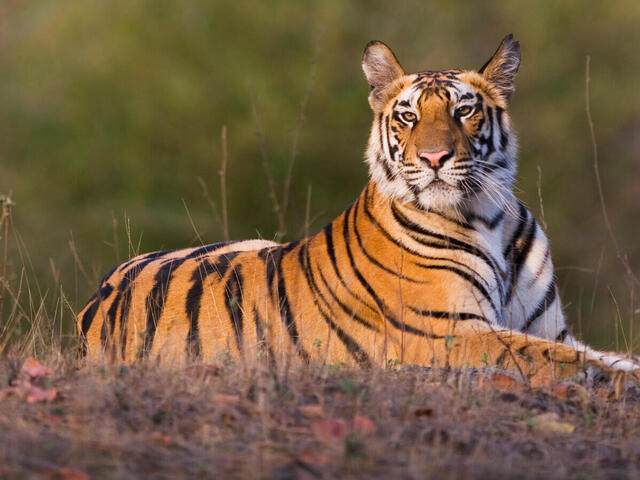

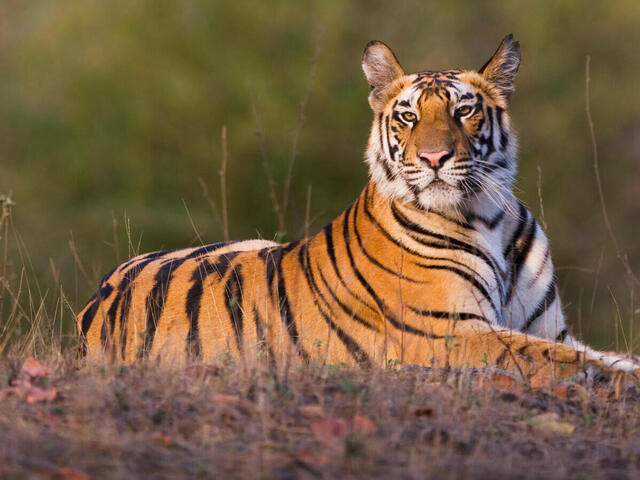

In [4]:
Image.open('tiger.jpg')

In [5]:
#We need to resize it now to (224, 224)

In [6]:
tiger = Image.open('tiger.jpg').resize(IMAGE_SHAPE)
#We resize it and store it into a variable called Tiger

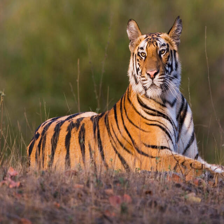

In [7]:
tiger
#small one è_é

In [8]:
#Remember, we always need to scale the image, because the color is from 0 to 255

In [9]:
#Converting the image into an array and scaled the picture
tiger = np.array(tiger)/255
tiger.shape

(224, 224, 3)

In [10]:
tiger
#You see now that the value are between 0 to 255

array([[[0.49803922, 0.43137255, 0.31372549],
        [0.49019608, 0.42352941, 0.30588235],
        [0.48235294, 0.41568627, 0.29411765],
        ...,
        [0.53333333, 0.4745098 , 0.23529412],
        [0.52941176, 0.47058824, 0.23921569],
        [0.52941176, 0.47058824, 0.25098039]],

       [[0.50980392, 0.43137255, 0.31764706],
        [0.49803922, 0.42352941, 0.30980392],
        [0.49411765, 0.41568627, 0.29803922],
        ...,
        [0.52941176, 0.47058824, 0.23529412],
        [0.52941176, 0.47058824, 0.24705882],
        [0.53333333, 0.47058824, 0.25882353]],

       [[0.51764706, 0.43137255, 0.31764706],
        [0.50980392, 0.42352941, 0.30980392],
        [0.50196078, 0.41960784, 0.30196078],
        ...,
        [0.5254902 , 0.4627451 , 0.23921569],
        [0.52941176, 0.46666667, 0.25882353],
        [0.5372549 , 0.4745098 , 0.27058824]],

       ...,

       [[0.35686275, 0.25098039, 0.23529412],
        [0.31372549, 0.23137255, 0.21960784],
        [0.31372549, 0

In [11]:
#np.newaxis will add another dimension to the array 
#We can't have only one image as an input so we need to add dimension

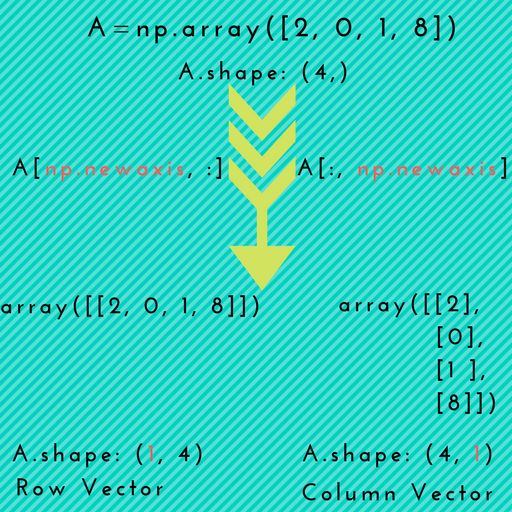

In [12]:
tiger[np.newaxis, ...].shape

#We will add one more dimension because when you do prediction, the prediction accepte multiple image as input not only one image

(1, 224, 224, 3)

In [13]:
result = classifier.predict(tiger[np.newaxis, ...])
result
#It's make prediction for each classes and we have 1000 classes

1/1 [==============================] - 2s 2s/step


array([[ 0.23820046,  0.46155423,  0.5662181 , ...,  0.5260187 ,
        -0.42672303,  1.0339632 ]], dtype=float32)

In [14]:
result.shape

(1, 1001)

In [15]:
#We will use argmax to know the max value

predicted_label_index = np.argmax(result)
predicted_label_index

#It's the 293 class

293

In [16]:
#We need to know wich is the class 293
#Fist we download all the classes

tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')

#We stored everything in ImageNetLabels.txt

'C:\\Users\\JULIA\\.keras\\datasets\\ImageNetLabels.txt'

In [19]:
image_labels = [] #We will store all the classes in image_labels
with open("Image_ssm.txt", "r") as f:
    image_labels = f.read().splitlines()
    
#Splitlines will separate each line from the one following it with a comma

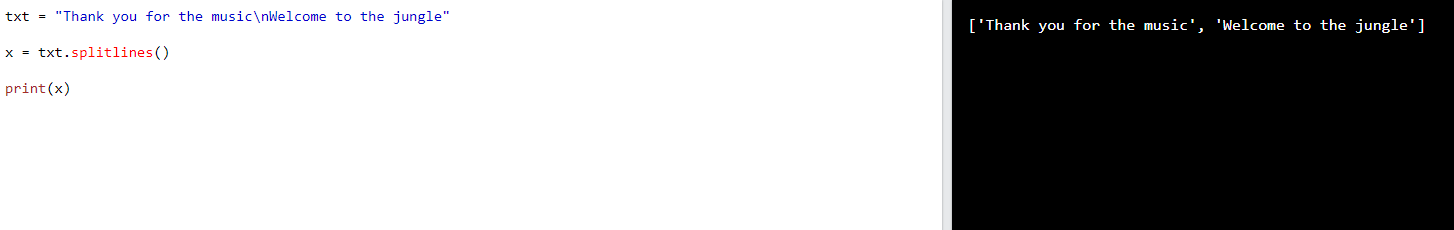

In [24]:
image_labels[293]
#It's a Tiger !
#You can also use image_labels[predicted_label_index]

'tiger'

In [25]:
#Look at everyclass
image_labels[:-1]

['background',
 'tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'European fire salamander',
 'common newt',
 'eft',
 'spotted salamander',
 'axolotl',
 'bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead',
 'leatherback turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'common iguana',
 'American chameleon',
 'whiptail',
 'agama',
 'frilled lizard',
 'alligator lizard',
 'Gila monster',
 'green lizard',
 'African chameleon',
 'Komodo dragon',
 'African crocodile',
 'American alligator',
 'triceratops',
 'thunder snake',
 'ringneck snake',
 'hognose snake',
 'green snake',
 'king snake',
 'garter snake',
 'water snake',
 'vine snake',
 'night snake',
 'boa constrictor',
 'rock python'

We used pretrained model, and just do classification!

In [26]:
#Now we need to do classification for the flower dataset
#First we need to download the dataset and store it in variable like last time

In [27]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [28]:
data_dir

'.\\datasets\\flower_photos'

In [30]:
import pathlib

#Transform it into Windows Path for facilitation
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [31]:
#Create a dictionary for all the classes with labels

flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [32]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [34]:
#We need to resize the picture , because they have different sizes
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [35]:
cv2.resize(img,(224,224)).shape
#We can also do cv2.resize(img.IMAGE_SHAPE).shape

(224, 224, 3)

In [36]:
#Preparing X and y like last time

X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [37]:
#Transform X and y into an array

X = np.array(X)
y = np.array(y)

In [39]:
#Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [40]:
#Preprocessing: scale images

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [42]:
X_train_scaled[1]
#It's scaled now

array([[[0.54901961, 0.52156863, 0.51372549],
        [0.29019608, 0.63921569, 0.40392157],
        [0.10588235, 0.5254902 , 0.28235294],
        ...,
        [0.00784314, 0.01960784, 0.01960784],
        [0.01176471, 0.03529412, 0.03137255],
        [0.        , 0.02352941, 0.01960784]],

       [[0.45490196, 0.69803922, 0.50196078],
        [0.16470588, 0.4       , 0.25490196],
        [0.10196078, 0.24313725, 0.16078431],
        ...,
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.01568627, 0.01568627],
        [0.        , 0.00784314, 0.00392157]],

       [[0.01176471, 0.3254902 , 0.17254902],
        [0.09411765, 0.25882353, 0.25098039],
        [0.29411765, 0.48235294, 0.44313725],
        ...,
        [0.01176471, 0.01176471, 0.01176471],
        [0.01568627, 0.01960784, 0.01960784],
        [0.00392157, 0.01568627, 0.01176471]],

       ...,

       [[0.13333333, 0.43921569, 0.54509804],
        [0.27058824, 0.48235294, 0.6627451 ],
        [0.25098039, 0

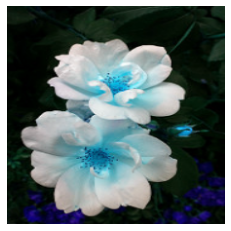

In [47]:
#Let's look at the first 3 flowers and try prediction with the pre-trained model
plt.axis('off')
plt.imshow(X[0])

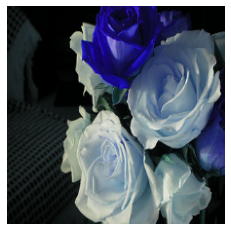

In [48]:
plt.axis('off')
plt.imshow(X[1])

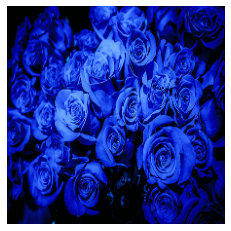

In [49]:
plt.axis('off')
plt.imshow(X[2])

In [51]:
#Let's now use our pretrained model to predict value !

predicted = classifier.predict(np.array([X[0],X[1],X[2]])) #Predict the first 3 flowers
predicted = np.argmax(predicted, axis=1) #To have the max value
predicted

#classifier is your pre-trained model

1/1 [==============================] - 1s 1s/step


array([795, 880, 795], dtype=int64)

In [54]:
#What are those predictions? we will use image labels
image_labels[795]

'shower curtain'

In [55]:
image_labels[880]

'umbrella'

In [56]:
image_labels[795]

'shower curtain'

In [58]:
#You see here, that you can not directly use the pre-trained model!
#He does not even have the 5 class flowers! so the model will make random guess of what it is!
#We will retrain the model 

In [60]:
#So we need to freeze all the layer but not the outcome

In [61]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
#It's the same link as the previous one but here we are using feature_vector and not classification
#That's mean we are taking all the layers but excluding the last one

In [63]:
#Now we can create the model
pretrained_model_without_top_layer = hub.KerasLayer(   #using tensorflow hub, creating KerasLayer
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)
#We are passing the URL into the layer "feature_extractor_model"
#Trainable = False, means freeze

In [64]:
#Creating the model

num_of_flowers = 5  #output (the last layer)

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [65]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5) #We only need to run 5 epochs

Epoch 1/5
86/86 [==============================] - 7s 43ms/step - loss: 0.8199 - acc: 0.6900
Epoch 2/5
86/86 [==============================] - 4s 43ms/step - loss: 0.4157 - acc: 0.8528
Epoch 3/5
86/86 [==============================] - 4s 43ms/step - loss: 0.3201 - acc: 0.8975
Epoch 4/5
86/86 [==============================] - 4s 43ms/step - loss: 0.2700 - acc: 0.9161
Epoch 5/5
86/86 [==============================] - 4s 43ms/step - loss: 0.2295 - acc: 0.9328


In [66]:
#Here with only 5 epochs we got 93% accuracy on the training test

In [68]:
model.evaluate(X_test_scaled,y_test) #and 86% for the testing test! Amazing

29/29 [==============================] - 2s 47ms/step - loss: 0.3763 - acc: 0.8682


[0.3763233721256256, 0.8681917190551758]